In [63]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('example/deeplearning/dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

# 처음 5줄을 봅니다.
df.head(5)


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:

# 데이터의 전반적인 정보를 확인해 봅니다.
df.info()

# 각 정보별 특징을 좀더 자세히 출력합니다.
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:

# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
df[['plasma', 'class']]


,plasma,class
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
5,116,0
6,78,1
7,115,0
8,197,1
9,125,1


In [72]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)


,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


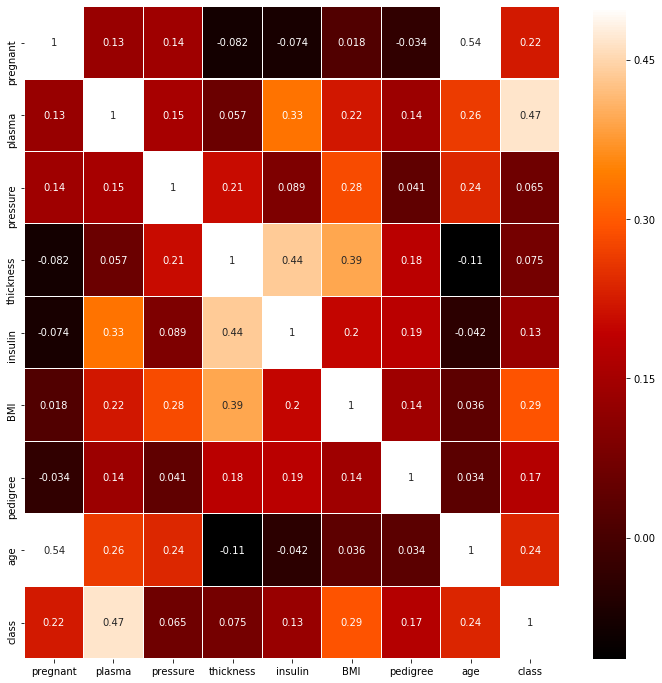

In [68]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(), linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

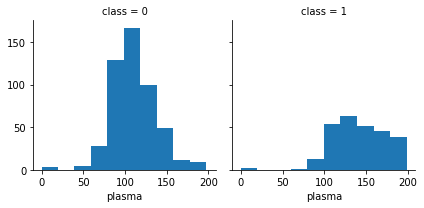

In [81]:

grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

In [82]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [58]:
import numpy
Data_set = numpy.loadtxt("example/deeplearning/dataset/ThoraricSurgery.csv", delimiter=",")

df = pd.read_csv("example/deeplearning/dataset/ThoraricSurgery.csv", 
                names=["att1","att2","att3","att4","att5","att6","att7","att8","att9","att10","att11","att12","att13","att14","att15","att16","att17","att18"])
# 처음 5줄을 봅니다.
df.head(5)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [39]:

# 데이터의 전반적인 정보를 확인해 봅니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
att1     470 non-null int64
att2     470 non-null int64
att3     470 non-null float64
att4     470 non-null float64
att5     470 non-null int64
att6     470 non-null int64
att7     470 non-null int64
att8     470 non-null int64
att9     470 non-null int64
att10    470 non-null int64
att11    470 non-null int64
att12    470 non-null int64
att13    470 non-null int64
att14    470 non-null int64
att15    470 non-null int64
att16    470 non-null int64
att17    470 non-null int64
att18    470 non-null int64
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [28]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [32]:

# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
df[['att1', 'att2']]


,att1,att2
0,293,1
1,1,2
2,8,2
3,14,2
4,17,2
5,18,2
6,35,2
7,42,2
8,65,2
9,111,2


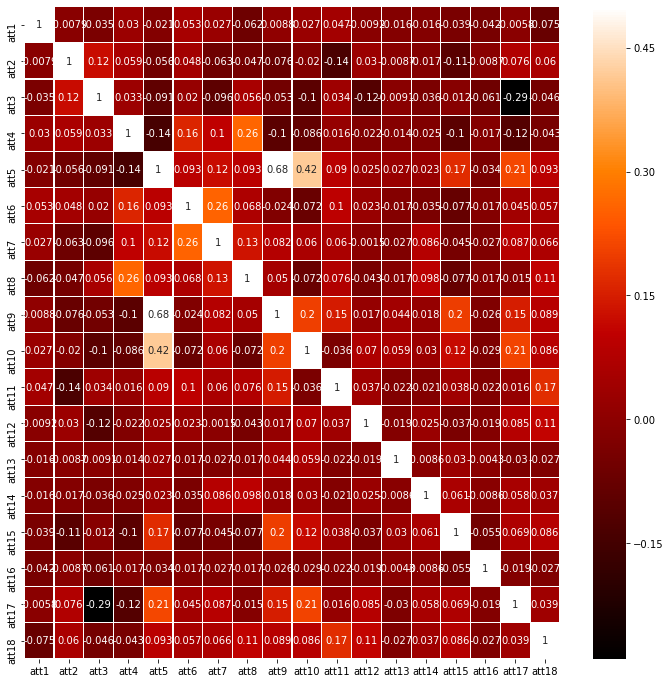

In [35]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(), linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()


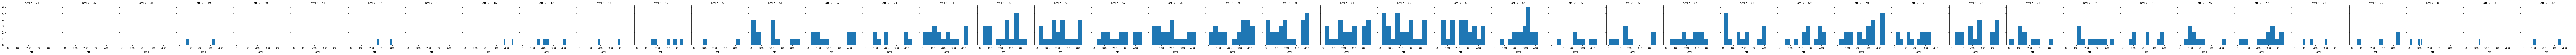